In [2]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#upload the dataset
!kaggle datasets download -d grouplens/movielens-20m-dataset

Dataset URL: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset


  0%|          | 0.00/195M [00:00<?, ?B/s]
  1%|          | 1.00M/195M [00:00<02:29, 1.36MB/s]
  1%|1         | 2.00M/195M [00:00<01:25, 2.36MB/s]
  2%|1         | 3.00M/195M [00:01<01:16, 2.65MB/s]
  2%|2         | 4.00M/195M [00:01<01:17, 2.60MB/s]
  3%|2         | 5.00M/195M [00:02<01:07, 2.94MB/s]
  3%|3         | 6.00M/195M [00:02<01:09, 2.88MB/s]
  4%|3         | 7.00M/195M [00:02<01:09, 2.84MB/s]
  4%|4         | 8.00M/195M [00:03<01:09, 2.81MB/s]
  5%|4         | 9.00M/195M [00:03<01:09, 2.79MB/s]
  5%|5         | 10.0M/195M [00:03<01:02, 3.12MB/s]
  6%|5         | 11.0M/195M [00:04<01:07, 2.86MB/s]
  6%|6         | 12.0M/195M [00:04<01:07, 2.83MB/s]
  7%|6         | 13.0M/195M [00:04<01:06, 2.86MB/s]
  7%|7         | 14.0M/195M [00:05<01:07, 2.82MB/s]
  8%|7         | 15.0M/195M [00:05<01:10, 2.69MB/s]
  8%|8         | 16.0M/195M [00:06<01:09, 2.69MB/s]
  9%|8         | 17.0M/195M [00:06<01:16, 2.44MB/s]
  9%|9         | 18.0M/195M [00:07<01:10, 2.63MB/s]
 10%|9         | 19.


License(s): unknown



In [6]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='movielens-20m-dataset.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('Data Extracted')

Data Extracted


In [5]:
df1movie=pd.read_csv('movie.csv')
df2rat=pd.read_csv('rating.csv')

In [6]:
df1movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df2rat.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


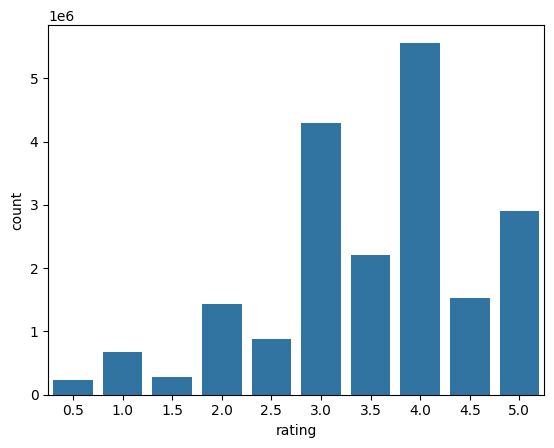

In [8]:
#distribution of movie ratings
sns.countplot(x='rating',data=df2rat)
plt.show()

In [9]:
#movies which are most frequently rated
df2rat['movieId'].value_counts()

movieId
296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
120833        1
120831        1
110052        1
123188        1
121699        1
Name: count, Length: 26744, dtype: int64

In [12]:
movie_ratings=df2rat.merge(df1movie,on='movieId')
movie_ratings['title'].value_counts()[0:10]

title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
Name: count, dtype: int64

In [13]:
#lowest and highest rated movies
mean_ratings=df2rat.groupby('movieId')[['rating']].mean()
lowest_rated=mean_ratings['rating'].idxmin()

In [14]:
lowest_rated

np.int64(5805)

In [15]:
df1movie[df1movie['movieId']==lowest_rated]

,movieId,title,genres
5706,5805,Besotted (2001),Drama


In [16]:
highest_rated=mean_ratings['rating'].idxmax()
df1movie[df1movie['movieId']==highest_rated]

,movieId,title,genres
9007,26718,Life On A String (Bian chang Bian Zou) (1991),Adventure|Drama|Fantasy|Musical


In [18]:
movie_stats=df2rat.groupby('movieId')['rating'].agg(['count','mean'])
movie_stats.head()

,count,mean
movieId,,
1,49695,3.921240
2,22243,3.211977
3,12735,3.151040
4,2756,2.861393
5,12161,3.064592


In [22]:
c=movie_stats['count'].mean()
m=movie_stats['mean'].mean()
print(c,m)
def bayavg(df2rat):
    bayavg1=(c*m+df2rat.sum())/(c+df2rat.count())
    return bayavg1

747.8411232425965 3.1331999901256933


In [23]:
lamerica=pd.Series([5,5])
bayavg(lamerica)

np.float64(3.138179178255044)

In [24]:
bayavgrat=df2rat.groupby('movieId')['rating'].agg(bayavg)

In [25]:
bayavgrat

movieId
1         3.909556
2         3.209414
3         3.150051
4         2.919406
5         3.068566
            ...   
131254    3.134358
131256    3.134358
131258    3.132354
131260    3.133022
131262    3.134358
Name: rating, Length: 26744, dtype: float64

In [26]:
bayavgrat.columns=['movieId','bayavg']
movie_stats=movie_stats.merge(bayavgrat,on='movieId')

In [27]:
movie_stats.head()

,count,mean,rating
movieId,,,
1,49695,3.921240,3.909556
2,22243,3.211977,3.209414
3,12735,3.151040,3.150051
4,2756,2.861393,2.919406
5,12161,3.064592,3.068566


In [28]:
#a glimpse atmovie genre
df1movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
#removing the genres column instead on string we can have a list
df1movie['genres']=df1movie['genres'].apply(lambda x: x.split('|'))

In [30]:
df1movie.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [31]:
#to see how many genres are there
from collections import Counter
gere_freq=Counter(g for genres in df1movie['genres'] for g in genres)
print(len(gere_freq))
gere_freq

20


Counter({'Drama': 13344,
         'Comedy': 8374,
         'Thriller': 4178,
         'Romance': 4127,
         'Action': 3520,
         'Crime': 2939,
         'Horror': 2611,
         'Documentary': 2471,
         'Adventure': 2329,
         'Sci-Fi': 1743,
         'Mystery': 1514,
         'Fantasy': 1412,
         'War': 1194,
         'Children': 1139,
         'Musical': 1036,
         'Animation': 1027,
         'Western': 676,
         'Film-Noir': 330,
         '(no genres listed)': 246,
         'IMAX': 196})

In [32]:
#mos common genres
print(gere_freq.most_common(5))

[('Drama', 13344), ('Comedy', 8374), ('Thriller', 4178), ('Romance', 4127), ('Action', 3520)]


In [35]:
gere_freq_df=pd.DataFrame([gere_freq]).T.reset_index()
gere_freq_df.columns=['genre','count']
gere_freq_df.head()

,genre,count
0,Adventure,2329
1,Animation,1027
2,Children,1139
3,Comedy,8374
4,Fantasy,1412


C:\Users\jinag\AppData\Local\Temp\ipykernel_1240\2528324142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre',y='count',data=gere_freq_df.sort_values(by='count',ascending=False),palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Romance'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Sci-Fi'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Fantasy'),
  Text(12, 0, 'War'),
  Text(13, 0, 'Children'),
  Text(14, 0, 'Musical'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'Film-Noir'),
  Text(18, 0, '(no genres listed)'),
  Text(19, 0, 'IMAX')])

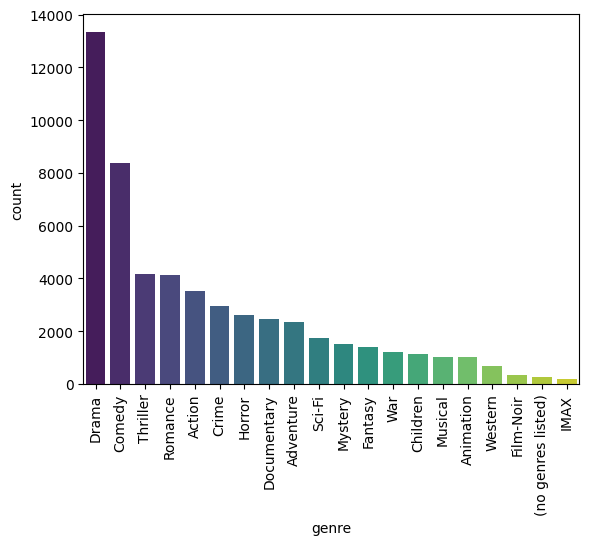

In [38]:
sns.barplot(x='genre',y='count',data=gere_freq_df.sort_values(by='count',ascending=False),palette='viridis')
plt.xticks(rotation=90)

In [41]:
#data preprocessing
from scipy.sparse import csr_matrix
def create(df):
    #generates sparse matrix from ratings dataframe
    m=df['userId'].nunique()
    n=df['movieId'].nunique()
    user_map=dict(zip(np.unique(df['userId']),list(range(m))))
    movie_map=dict(zip(np.unique(df['movieId']),list(range(n))))
    user_inv=dict(zip(list(range(m)),np.unique(df['userId'])))
    movie_inv=dict(zip(list(range(n)),np.unique(df['movieId'])))
    user_idx=[user_map[i] for i in df['userId']]
    item_idx=[movie_map[i] for i in df['movieId']]
    
    x=csr_matrix((df['rating'],(user_idx,item_idx)),shape=(m,n))
    return x,user_map,movie_map,user_inv,movie_inv,user_idx,item_idx
x,user_map,movie_map,user_inv,movie_inv,user_idx,item_idx=create(df2rat)

In [43]:
x.shape

(138493, 26744)

In [44]:
#evaluate sparsity
total=x.shape[0]*x.shape[1]
ratings=x.nnz
sparsity=ratings/total
print(sparsity)

0.0053998478135544505


In [45]:
ratings_per_user=x.getnnz(axis=1)
len(ratings_per_user)

138493

In [46]:
#most and least active users
print(ratings_per_user.max())
print(ratings_per_user.min())

9254
20


In [47]:
ratings_per_movie=x.getnnz(axis=0)
len(ratings_per_movie)

26744

In [48]:
#most and least active movies
print(ratings_per_movie.max())
print(ratings_per_movie.min())

67310
1


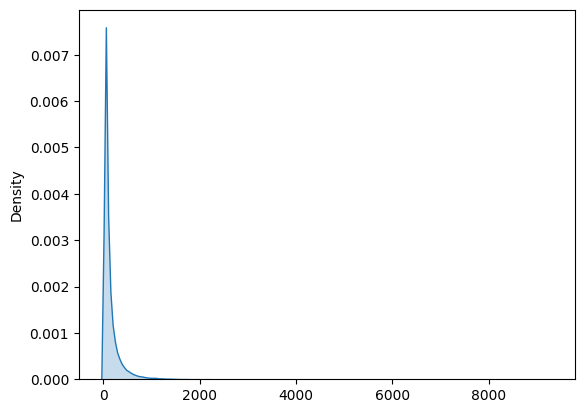

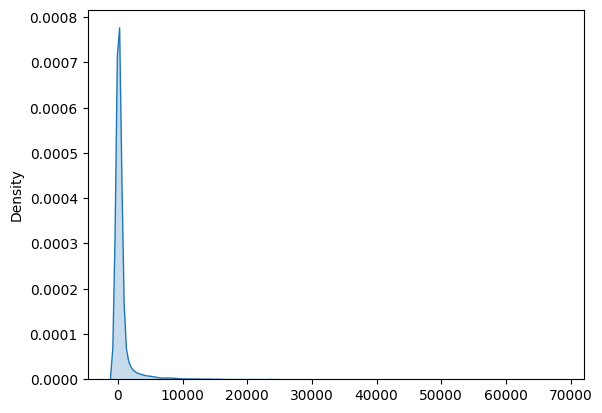

In [51]:
sns.kdeplot(ratings_per_user,fill=True)
plt.show()
sns.kdeplot(ratings_per_movie,fill=True)
plt.show()

In [56]:
#recommendations with k-nn
from sklearn.neighbors import NearestNeighbors
def find_similar_movies(movie_id,x,movie_map,movie_inv,k,metric='cosine'):
    x=x.T
    neigh_id=[]
    movie_ind=movie_map[movie_id]
    movie_vec=x[movie_ind]
    if isinstance(movie_vec,(np.ndarray)):
        movie_vec=movie_vec.reshape(1,-1)
    knn=NearestNeighbors(n_neighbors=k+1,algorithm="brute",metric=metric)
    knn.fit(x)
    neighbour=knn.kneighbors(movie_vec,return_distance=False)
    for i in range(0,k):
        n=neighbour.item(i)
        neigh_id.append(movie_inv[n])
    neigh_id.pop(0)
    return neigh_id

In [57]:
simil_mov=find_similar_movies(1,x,movie_map,movie_inv,k=10)
simil_mov

[np.int64(260),
 np.int64(780),
 np.int64(1210),
 np.int64(3114),
 np.int64(1270),
 np.int64(356),
 np.int64(588),
 np.int64(648),
 np.int64(480)]

In [58]:
movie_titles=dict(zip(df1movie['movieId'],df1movie['title']))
movie_id=1#movie titles
simil_mov=find_similar_movies(movie_id,x,movie_map,movie_inv,metric='cosine',k=10)
movie_title=movie_titles[movie_id]
print(movie_title)
for i in simil_mov:
    print(movie_titles[i])

Toy Story (1995)
Star Wars: Episode IV - A New Hope (1977)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode VI - Return of the Jedi (1983)
Toy Story 2 (1999)
Back to the Future (1985)
Forrest Gump (1994)
Aladdin (1992)
Mission: Impossible (1996)
Jurassic Park (1993)


In [59]:
#movies that have no or very few readings
#content based filtering
#handling the cold-start problem
n=df1movie['movieId'].nunique()
print(n)

27278


In [63]:
genres=set(g for G in df1movie['genres'] for g in G)
for g in genres:
    df1movie[g]=df1movie.genres.transform(lambda x: int(g in x))

df1movie
movie_genres=df1movie.drop(columns=['movieId','title','genres'])

In [64]:
df1movie.head()

,movieId,title,genres,Children,Crime,Comedy,IMAX,Film-Noir,Fantasy,War,...,(no genres listed),Sci-Fi,Musical,Documentary,Horror,Animation,Mystery,Drama,Western,Action
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#from sklearn.metrics.pairwise import cosine_similarity
#cosine_sim=cosine_similarity(movie_genres,movie_genres)
#print(cosine_sim.shape)
movie_genres

,Children,Crime,Comedy,IMAX,Film-Noir,Fantasy,War,Adventure,Thriller,Romance,(no genres listed),Sci-Fi,Musical,Documentary,Horror,Animation,Mystery,Drama,Western,Action
0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27276,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [72]:
#cosine_sim[0]

In [74]:
#creating a movie finder function
from fuzzywuzzy import process
def movie_finder(title):
    all_title=df1movie['title'].tolist()
    closest_match=process.extractOne(title,all_title)
    return closest_match[0]

C:\Users\jinag\AppData\Roaming\Python\Python312\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [75]:
title=movie_finder('juminji')
title

'Jumanji (1995)'

In [76]:
#to get the relevant recommendations
movie_idx=dict(zip(df1movie['title'],list(df1movie.index)))
idx=movie_idx[title]
print(idx)

1


In [82]:
#n=10
#sin_score=list(enumerate(cosine_sim[idx]))
#sin_score=sorted(sin_score,key=lambda x:x[1],reverse=True)
#sin_score=sin_score[1:(n+1)]
#sin_score

In [87]:
#using SVD(single valued decomposition)
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=20,n_iter=10)
q=svd.fit_transform(x.T)
q.shape

(26744, 20)

In [88]:
x.shape

(138493, 26744)

In [90]:
movie_id=1
similar_movies=find_similar_movies(movie_id,q.T,movie_map,movie_inv,metric='cosine',k=10)
movie_title1=movie_titles[movie_id]
print(movie_title1)
for i in similar_movies:
    print(movie_titles[i])

Toy Story (1995)
Willy Wonka & the Chocolate Factory (1971)
Independence Day (a.k.a. ID4) (1996)
Mission: Impossible (1996)
James and the Giant Peach (1996)
Toy Story 2 (1999)
Twister (1996)
Star Wars: Episode IV - A New Hope (1977)
Lion King, The (1994)
Rock, The (1996)
